In [ ]:
# NASA Exoplanet Regression Analysis
# Dataset: https://www.kaggle.com/datasets/adityamishraml/nasaexoplanets

print("Starting Exoplanet Regression Analysis")
print("Using local CSV file: exoplanet.csv")

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load the local CSV file
df = pd.read_csv('exoplanet.csv')

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print("First 5 records:")
print(df.head())

## Data Loading

This notebook uses a local CSV file (`exoplanet.csv`) containing the NASA Exoplanets dataset. The dataset contains information about confirmed exoplanets discovered by NASA.

**Dataset Source:** [NASA Exoplanets Dataset on Kaggle](https://www.kaggle.com/datasets/adityamishraml/nasaexoplanets)

The CSV file should be placed in the same directory as this notebook for the analysis to work properly.

Initial look of the dataset and its features

In [ ]:
df.value_counts()

,,,,,,,,,,,,,count
name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method,
psi1 Draconis B b,74.0,5.80800,Gas Giant,2015,1.53000,Jupiter,1.210,Jupiter,4.430000,8.500000,0.40,Radial Velocity,1
11 Comae Berenices b,304.0,4.72307,Gas Giant,2007,19.40000,Jupiter,1.080,Jupiter,1.290000,0.892539,0.23,Radial Velocity,1
11 Ursae Minoris b,409.0,5.01300,Gas Giant,2009,14.74000,Jupiter,1.090,Jupiter,1.530000,1.400000,0.08,Radial Velocity,1
14 Andromedae b,246.0,5.23133,Gas Giant,2008,4.80000,Jupiter,1.150,Jupiter,0.830000,0.508693,0.00,Radial Velocity,1
14 Herculis b,58.0,6.61935,Gas Giant,2002,8.13881,Jupiter,1.120,Jupiter,2.773069,4.800000,0.37,Radial Velocity,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61 Virginis c,28.0,4.69550,Neptune-like,2009,18.20000,Earth,0.398,Jupiter,0.217500,0.104038,0.14,Radial Velocity,1
61 Virginis d,28.0,4.69550,Neptune-like,2009,22.90000,Earth,0.456,Jupiter,0.476000,0.336756,0.35,Radial Velocity,1
7 Canis Majoris b,65.0,3.95000,Gas Giant,2011,1.85000,Jupiter,1.200,Jupiter,1.758000,2.000000,0.06,Radial Velocity,1


Checking for duplicated values in dataset

In [ ]:
df.duplicated().sum()

np.int64(0)

Checking for null values in dataset

In [ ]:
df.isnull().sum()

,0
name,0
distance,17
stellar_magnitude,161
planet_type,0
discovery_year,0
mass_multiplier,23
mass_wrt,23
radius_multiplier,17
radius_wrt,17
orbital_radius,289


Dropping all null values in dataset

In [ ]:
df = df.dropna()

Engineering two new features using already existing features for the calculation.

In [ ]:
import pandas as pd
import numpy as np

mass_wrt_mapping = {
        'Earth': 1,  # Assuming Earth mass as 1
        'Jupiter': 317.83,  # Jupiter mass in Earth masses
    }

radius_wrt_mapping = {
    'Jupiter': 11.209,  # Jupiter radius in Earth radii
    'Earth': 1  # Assuming Earth radius as 1
}


# Calculate mass and radius using the numerical values
df['calculated_mass'] = df['mass_multiplier'] * df['mass_wrt'].map(mass_wrt_mapping)
df['calculated_radius'] = df['radius_multiplier'] * df['radius_wrt'].map(radius_wrt_mapping)

Encoding planet type based on size, and dropping all irrelevant features

In [ ]:
planet_type_mapping = {
    "Terrestrial": 1,
    "Super Earth": 2,
    "Neptune-like": 3,
    "Gas Giant": 4,

}

df["planet_type_encoded"] = df["planet_type"].map(planet_type_mapping)

df = df.drop(['detection_method', 'planet_type', 'name', 'mass_wrt', 'radius_wrt','mass_multiplier', 'radius_multiplier', 'discovery_year'], axis=1)

Initial view of data distribution

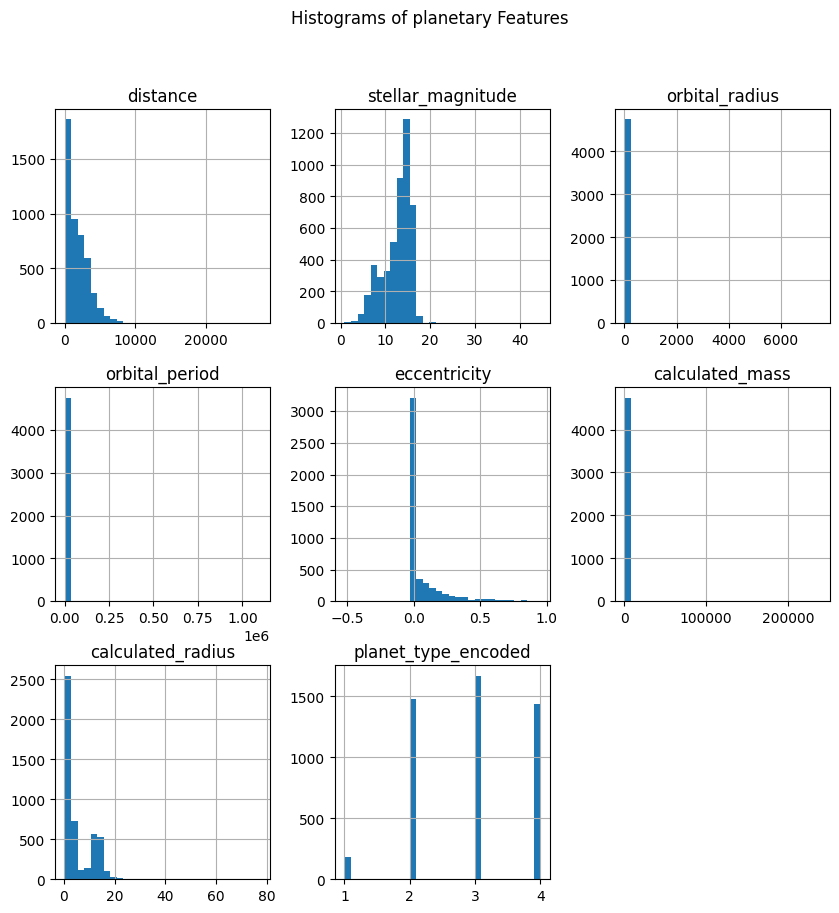

In [ ]:
import matplotlib.pyplot as plt
df.hist(bins=30, figsize=(10, 10))
plt.suptitle("Histograms of planetary Features")
plt.show()

Initial view of outliers, denoted by circles.

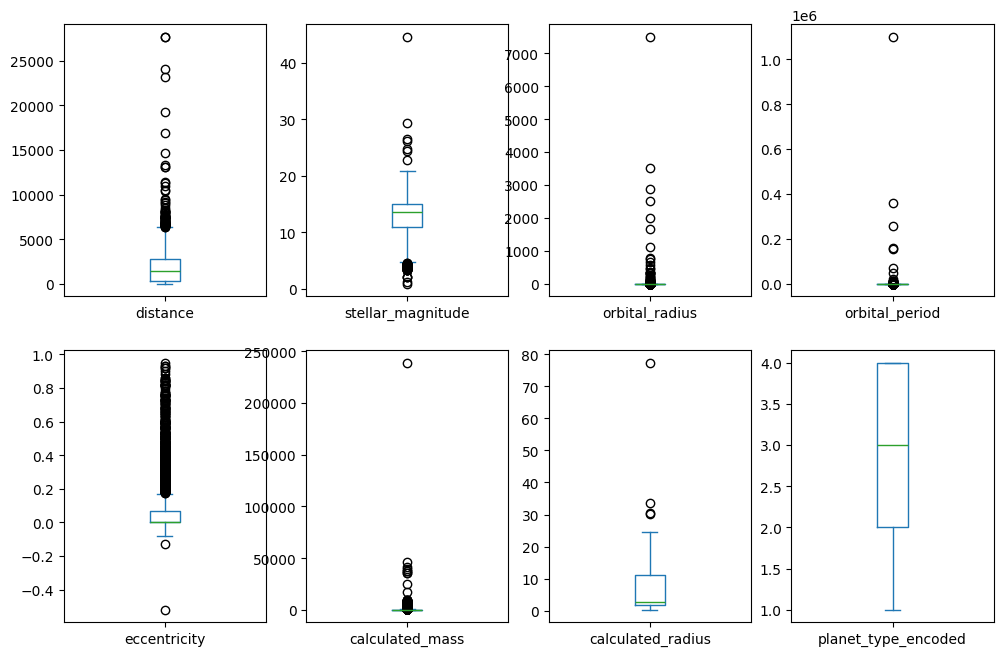

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df.plot(kind='box', subplots=True, layout=(3,4), figsize=(12, 12))  # Adjust layout and figsize as needed
plt.show()

Using z-scores to check for outliers that are +-3 from the normal standard deviation.

In [ ]:
import numpy as np
from scipy import stats

# Calculate Z-scores for each feature
z_scores = np.abs(stats.zscore(df))  # df is your dataframe

# Identify outliers (Z-score > 3)
outliers = (z_scores > 3)
outliers_indices = np.where(outliers)[0]  # Indices of outliers
print(f"Outliers detected at indices: {outliers_indices}")

upper_limit = df.quantile(0.75)
lower_limit = df.quantile(0.02)
df = df.clip(lower=lower_limit, upper=upper_limit, axis=1)


Outliers detected at indices: [   4   43   44   47   61   62   68   71   71   72   76   78   78   79
   89   90  115  115  117  148  149  157  179  186  194  280  282  282
  284  287  306  309  319  342  346  369  390  395  416  428  428  461
  462  466  472  490  521  529  536  542  543  546  552  564  575  577
  584  592  606  607  618  624  629  640  645  657  659  670  671  675
  679  680  685  687  690  706  732  736  751  763  765  768  783  793
  800  805  826  829  830  833  844  848  856  861  874  888  903  914
  924  928  945  949  956  968  970  976  979  982  985  986 1009 1012
 1020 1021 1022 1037 1060 1062 1068 1074 1075 1077 1080 1089 1098 1099
 1102 1107 1133 1142 1151 1169 1184 1185 1188 1191 1193 1204 1205 1207
 1214 1217 1219 1478 1670 1948 1983 2082 2138 2155 2216 2244 2246 2378
 2404 2444 2445 2507 2621 2807 3046 3047 3073 3425 3443 3453 3463 3466
 3489 3515 3516 3533 3536 3542 3788 3844 3845 3846 3874 3893 3900 3901
 3995 4064 4069 4100 4133 4204 4208 4260 4260 4

Performing a log transformation to help with skewed data, and to help to compress the wide ranges of these features and make their distributions more manageable

In [ ]:
df['distance'] = np.log1p(df['distance'])
df['orbital_radius'] = np.log1p(df['orbital_radius'])
df['orbital_period'] = np.log1p(df['orbital_period'])
df['calculated_mass'] = np.log1p(df['calculated_mass'])
df['calculated_radius'] = np.log1p(df['calculated_radius'])

Visualization of the dataset after encoding, outlier deletion, and the log transformation,

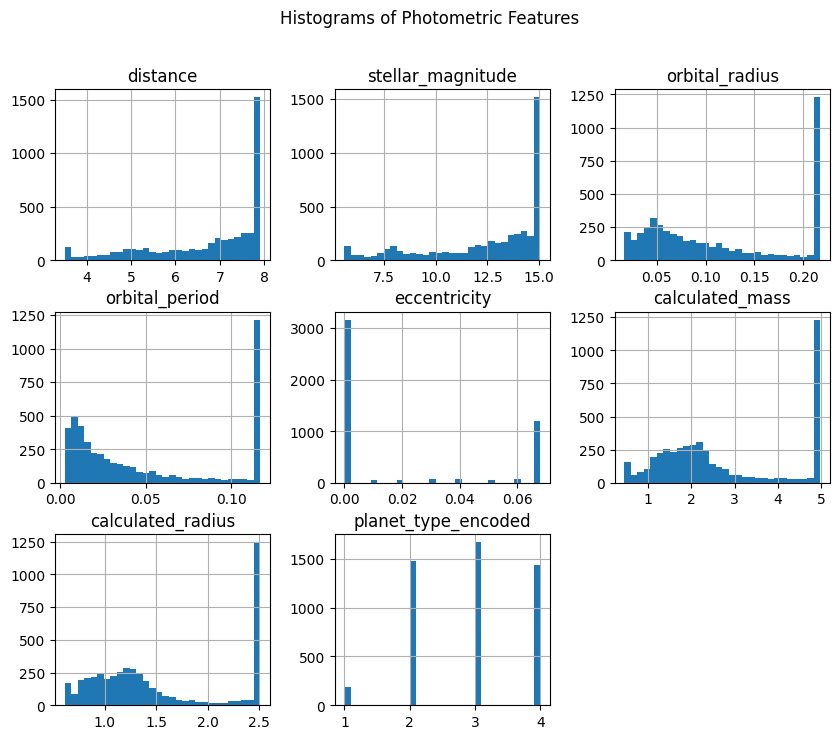

In [ ]:
import matplotlib.pyplot as plt
df.hist(bins=30, figsize=(10, 8))
plt.suptitle("Histograms of Photometric Features")
plt.show()

Visualization of the dataset after outlier deletion, as seen here there are no outliers present

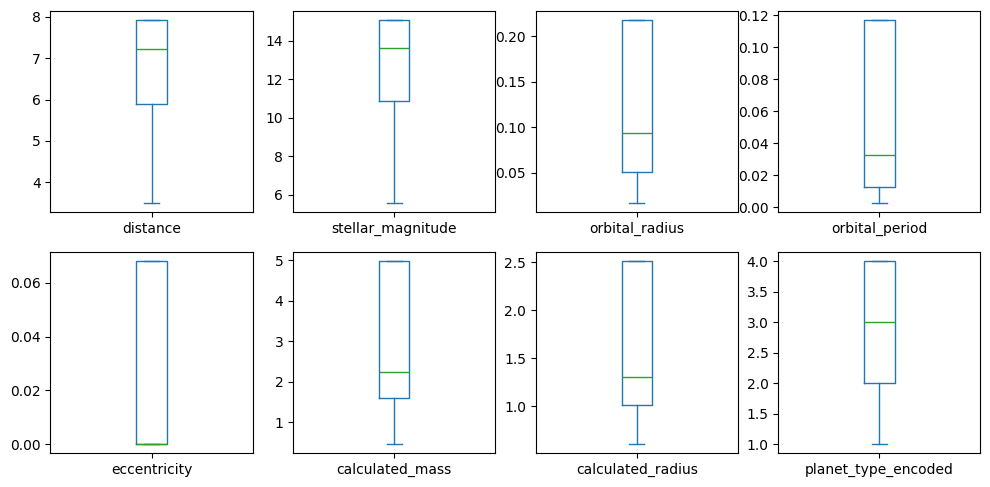

In [ ]:
import pandas as pd

df.plot(kind='box', subplots=True, layout=(4, 4), figsize=(12, 12))  # Adjust layout and figsize as needed
plt.show()

In [ ]:
df.describe()

,distance,stellar_magnitude,orbital_radius,orbital_period,eccentricity,calculated_mass,calculated_radius,planet_type_encoded
count,4765.000000,4765.000000,4765.000000,4765.000000,4765.000000,4765.000000,4765.000000,4765.000000
mean,6.752729,12.521872,0.115635,0.051489,0.020237,2.781094,1.546497,2.914376
std,1.280615,2.835384,0.072302,0.044175,0.029877,1.507701,0.661529,0.870385
min,3.496508,5.569110,0.016603,0.002538,0.000000,0.463734,0.609766,1.000000
25%,5.883322,10.883000,0.050978,0.012515,0.000000,1.595339,1.011601,2.000000
50%,7.234898,13.629000,0.094128,0.032591,0.000000,2.235376,1.308703,3.000000
75%,7.916443,15.061000,0.217528,0.116916,0.068000,4.969976,2.509491,4.000000
max,7.916443,15.061000,0.217528,0.116916,0.068000,4.969976,2.509491,4.000000


In [ ]:
df.head()

,distance,stellar_magnitude,orbital_radius,orbital_period,eccentricity,calculated_mass,calculated_radius,planet_type_encoded
0,5.720312,5.56911,0.217528,0.116916,0.068,4.969976,2.509491,4
1,6.016157,5.56911,0.217528,0.116916,0.068,4.969976,2.509491,4
2,5.509388,5.56911,0.217528,0.116916,0.000,4.969976,2.509491,4
3,4.077537,6.61935,0.217528,0.116916,0.068,4.969976,2.509491,4
4,4.248495,6.21500,0.217528,0.116916,0.068,4.969976,2.509491,4


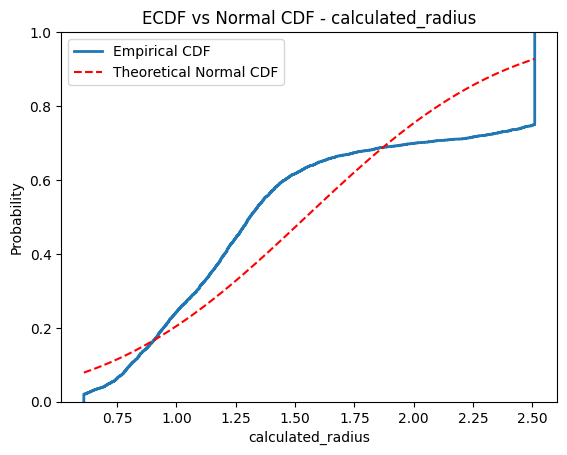

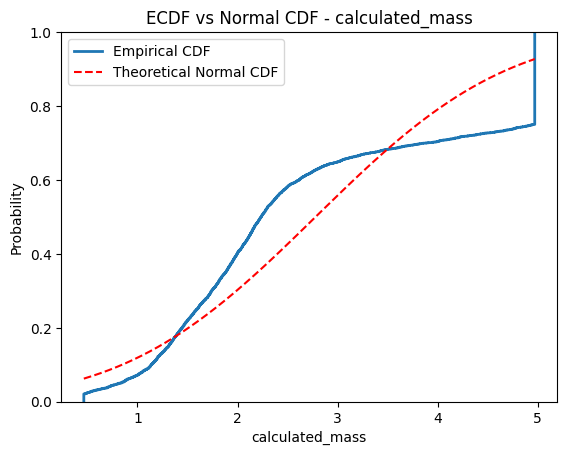

In [ ]:
from scipy.stats import norm
import numpy as np

# Function to plot ECDF vs Normal CDF
def plot_ecdf_vs_normal(feature):
    data = df[feature]
    mu, std = np.mean(data), np.std(data)

    # Plotting ECDF
    sns.ecdfplot(data, label='Empirical CDF', linewidth=2)

    # Plotting Theoretical Normal CDF
    x = np.linspace(min(data), max(data), 1000)
    plt.plot(x, norm.cdf(x, mu, std), label='Theoretical Normal CDF', color='red', linestyle='--')

    # Plot formatting
    plt.title(f'ECDF vs Normal CDF - {feature}')
    plt.xlabel(feature)
    plt.ylabel('Probability')
    plt.legend()
    plt.show()

plot_ecdf_vs_normal('calculated_radius')
plot_ecdf_vs_normal('calculated_mass')

Visualization of the correlation matrix to see which attributes are heavily correlated with each other and the target feature

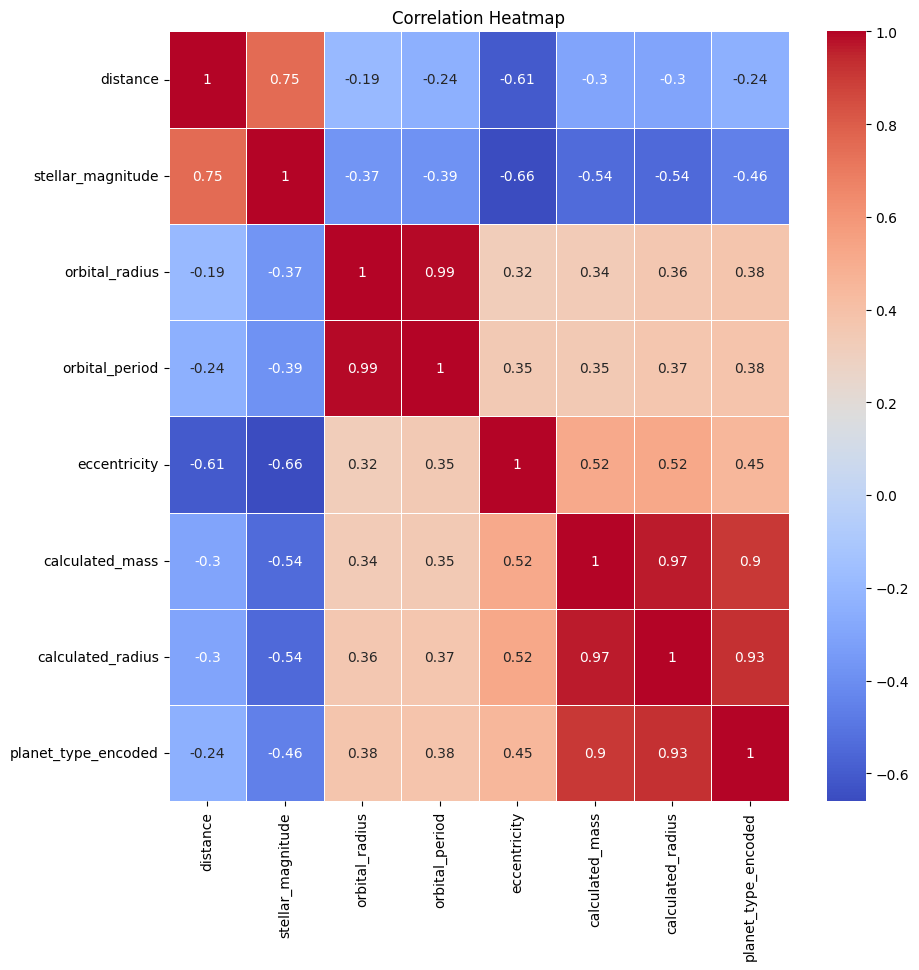

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a correlation matrix
corr_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

Dropping orbital period as it is very similar to

In [ ]:
df.drop(['orbital_period'], axis=1, inplace=True)

The dataset after irrelavant features were dropped, and preproccesing was applied. As can be seen, the dataset lost little informational rows, but also lost lots of outliers.

In [ ]:
df.value_counts()

distance  stellar_magnitude  orbital_radius  eccentricity  calculated_mass  calculated_radius  planet_type_encoded
7.916443  15.061             0.217528        0.000         4.969976         2.509491           4                      5
4.912655  5.980              0.217528        0.068         4.969976         2.509491           4                      3
7.916443  15.061             0.217528        0.000         2.235376         1.341472           3                      3
                                                           2.152924         1.299576           3                      3
5.323010  8.980              0.217528        0.068         4.969976         2.509491           4                      2
                                                                                                                     ..
6.616065  11.493             0.116716        0.000         2.840831         1.226693           2                      1
6.614726  13.181             0.092032        0.000         1.788421         1.124930           2                      1
          11.094             0.072321        0.000         2.186051         1.317747           3                      1
          7.732              0.217528        0.068         4.969976         2.509491           4                      1
6.626718  10.632             0.031014        0.000         4.969976         2.509491           4                      1
Name: count, Length: 4688, dtype: int64

GridsearchCV of the model to find the best hyperparameters to use

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import sklearn as sklearn

# Select features and target variable
X = df.drop(['calculated_radius'], axis=1)
y = df['calculated_radius']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Polynomial Regression': make_pipeline(PolynomialFeatures(), LinearRegression()),
    'Principal Components Regression': make_pipeline(PCA(n_components=2), LinearRegression()),
    'Support Vector Regression': SVR(),
}

# Define hyperparameters for GridSearchCV
param_grids = {
    'Linear Regression': {},
    'Polynomial Regression': {
        'polynomialfeatures__degree': [2, 3, 4]  # Degree of polynomial features
    },
    'Principal Components Regression': {
        'pca__n_components': [2, 3, 4]  # Number of principal components
    },
    'Support Vector Regression': {
        'C': [0.1, 1, 10],  # Regularization parameter
        'epsilon': [0.1, 0.2, 0.5],  # Epsilon parameter
        'kernel': ['linear', 'rbf']  # Different kernel functions
    }
}

# Perform GridSearchCV for each model
grid_search_results = {}

for model_name, model in models.items():
    print(f"Running GridSearchCV for {model_name}")
    grid_search = GridSearchCV(model, param_grid=param_grids[model_name], cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    grid_search_results[model_name] = grid_search.best_params_

# Output the best parameters for each model
for model_name, best_params in grid_search_results.items():
    print(f"Best parameters for {model_name}: {best_params}")


Running GridSearchCV for Linear Regression
Running GridSearchCV for Polynomial Regression
Running GridSearchCV for Principal Components Regression
Running GridSearchCV for Support Vector Regression
Best parameters for Linear Regression: {}
Best parameters for Polynomial Regression: {'polynomialfeatures__degree': 2}
Best parameters for Principal Components Regression: {'pca__n_components': 4}
Best parameters for Support Vector Regression: {'C': 10, 'epsilon': 0.1, 'kernel': 'rbf'}


Training and testing of the models using the gridsearchCV parameters

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import (
    LinearRegression, Ridge, ElasticNet, Lasso, BayesianRidge, LogisticRegression, PoissonRegressor
)
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_decomposition import PLSRegression
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import time


# Select features and target variable
X = df.drop(['calculated_radius'], axis=1)
y = df['calculated_radius']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Scale features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Polynomial Regression': make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    'Principal Components Regression': make_pipeline(PCA(n_components=4), LinearRegression()),
    'Support Vector Regression': SVR(C=10, epsilon=0.1, kernel='rbf'),


}

# Train and evaluate models
results = []
for name, model in models.items():
    start_train = time.time()
    model.fit(X_train, y_train)
    end_train = time.time()

    start_pred = time.time()
    y_pred = model.predict(X_test)
    end_pred = time.time()

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results.append({
        'Model': name,
        'Training Time (s)': end_train - start_train,
        'Prediction Time (s)': end_pred - start_pred,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2-score': r2
    })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by=['R2-score'], ascending=False)
print(results_df.to_markdown(floatfmt=".4f", index=False))


| Model                           |   Training Time (s) |   Prediction Time (s) |    MAE |    MSE |   RMSE |   R2-score |
|:--------------------------------|--------------------:|----------------------:|-------:|-------:|-------:|-----------:|
| Polynomial Regression           |              0.0130 |                0.0010 | 0.0537 | 0.0117 | 0.1080 |     0.9739 |
| Support Vector Regression       |              0.8220 |                0.0378 | 0.0742 | 0.0131 | 0.1143 |     0.9707 |
| Linear Regression               |              0.0024 |                0.0003 | 0.0816 | 0.0216 | 0.1471 |     0.9515 |
| Principal Components Regression |              0.0092 |                0.0008 | 0.1051 | 0.0232 | 0.1524 |     0.9479 |


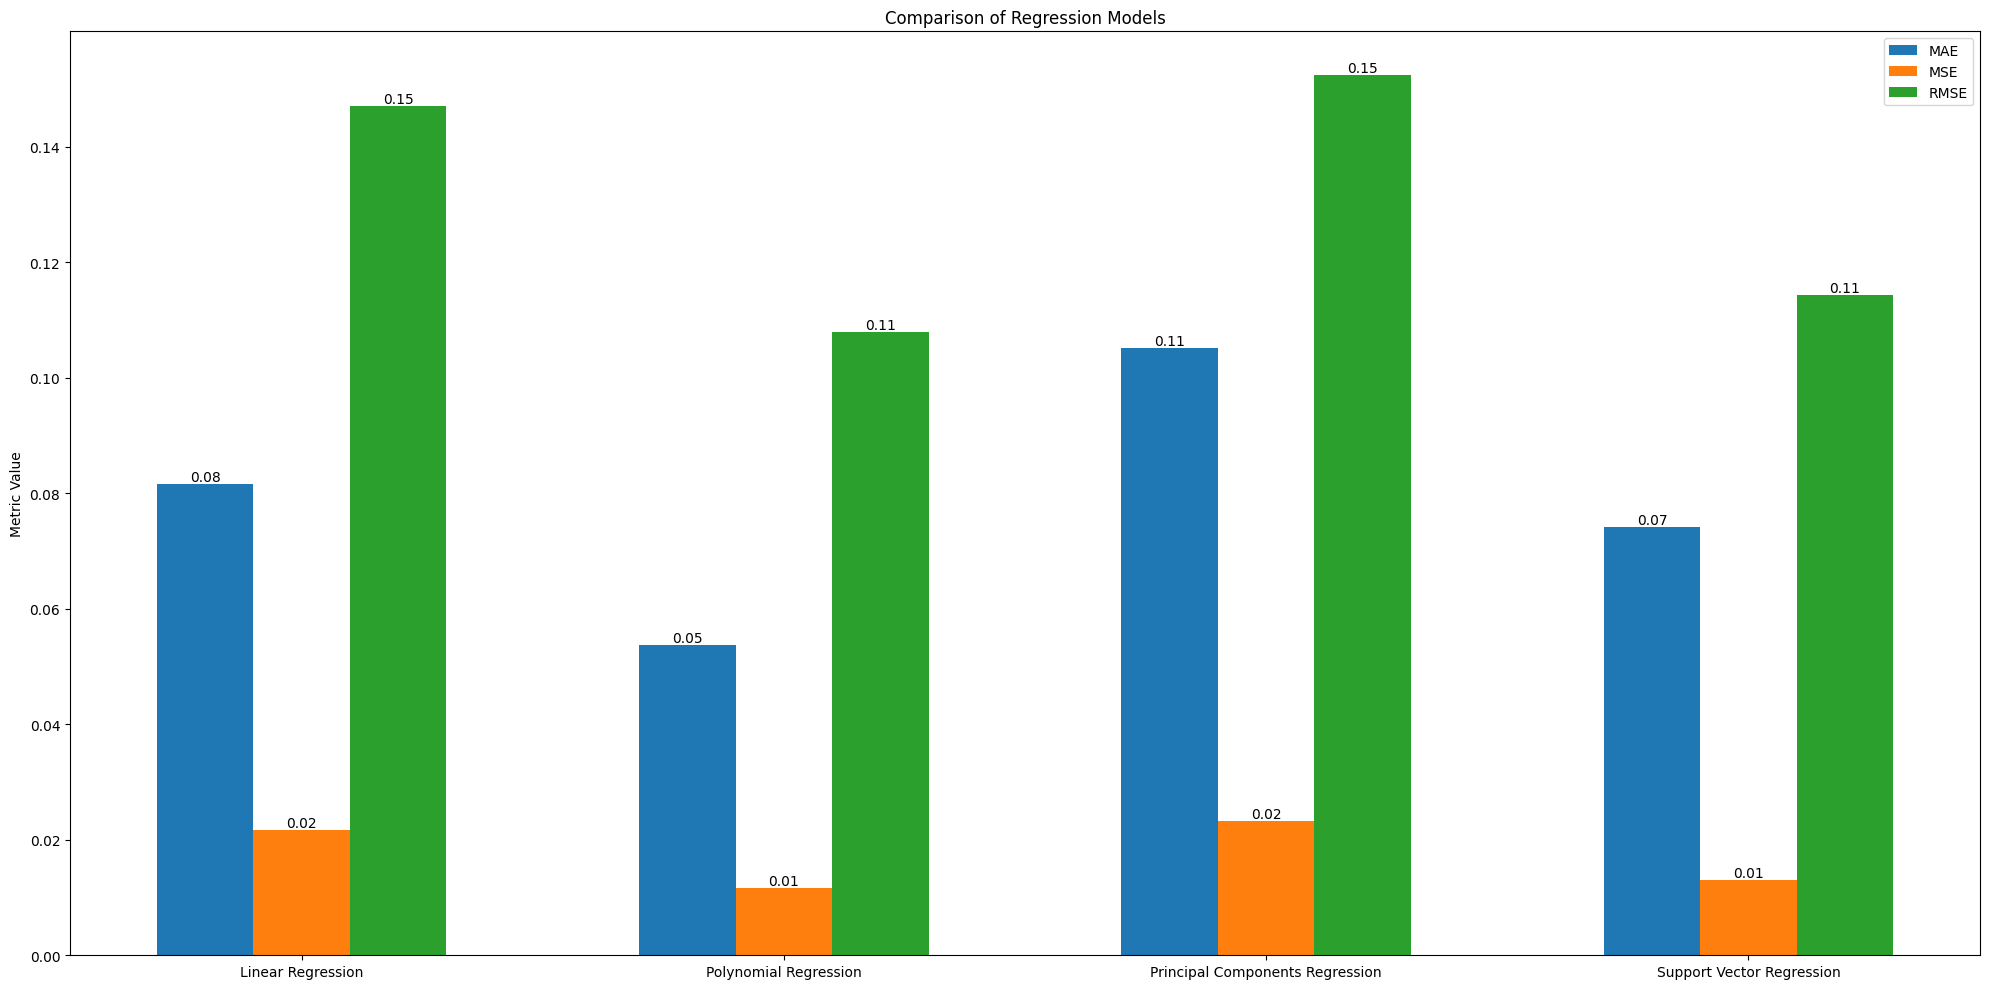

In [ ]:
metrics = ['MAE', 'MSE', 'RMSE', 'R2-score']
model_names = [result['Model'] for result in results]
values = [[result[metric] for result in results] for metric in metrics]

x = np.arange(len(model_names))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(20, 10))
rects1 = ax.bar(x - width, values[0], width, label=metrics[0])
rects2 = ax.bar(x, values[1], width, label=metrics[1])
rects3 = ax.bar(x + width, values[2], width, label=metrics[2])

# text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Metric Value')
ax.set_title('Comparison of Regression Models')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

for rect in rects1 + rects2 + rects3:  # Include all bar containers
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height,
            f'{height:.2f}',  # Format value to 2 decimal places
            ha='center', va='bottom')

fig.tight_layout()
plt.show()

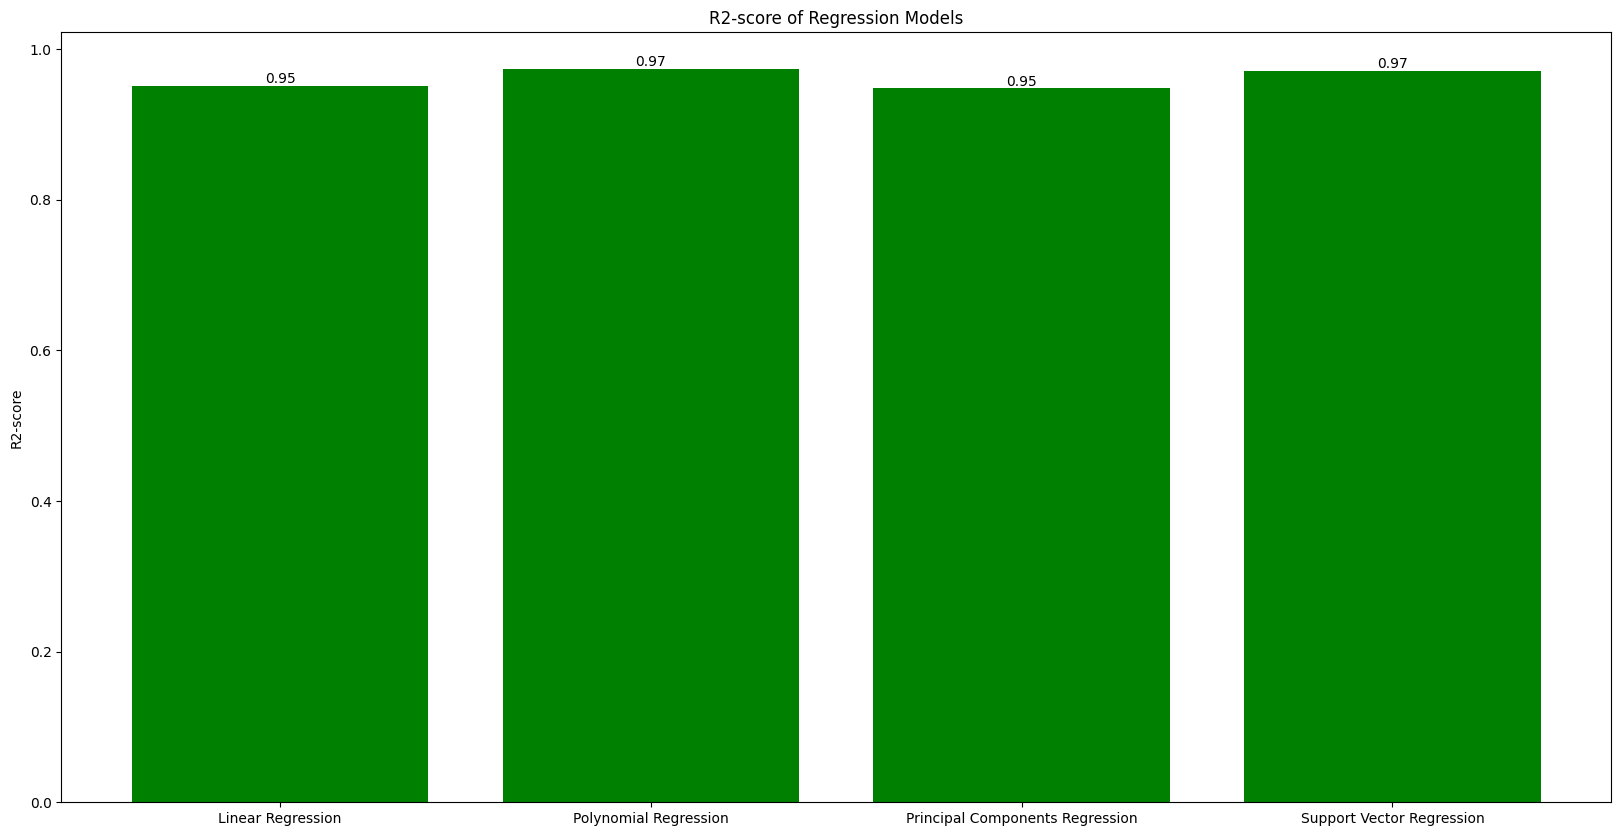

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(model_names, values[3], color='green')
ax.set_ylabel('R2-score')
ax.set_title('R2-score of Regression Models')
for rect in ax.patches:  # Iterate through bar patches
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height,
            f'{height:.2f}',  # Format value to 2 decimal places
            ha='center', va='bottom')
plt.show()

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_dbscan = dbscan.fit_predict(X_scaled)

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_scaled)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

agglomerative = AgglomerativeClustering(n_clusters=3)
clusters_ac = agglomerative.fit_predict(X_scaled)

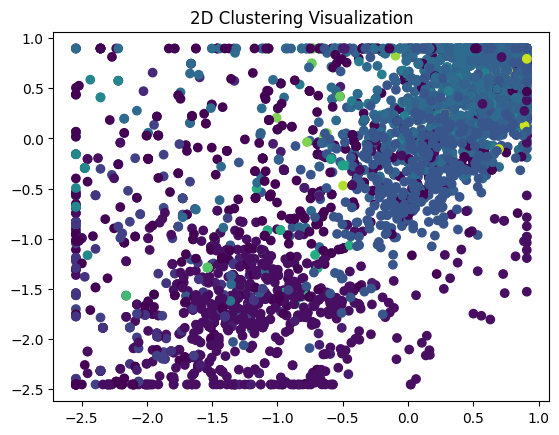

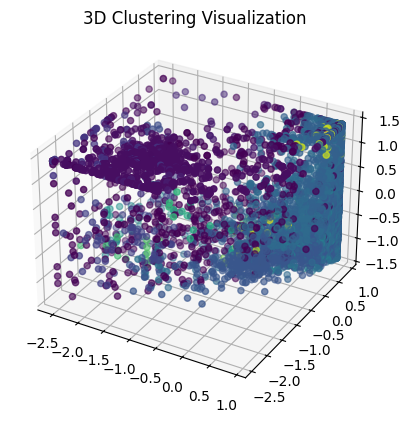

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters_dbscan)
plt.title("2D Clustering Visualization")
plt.show()


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=clusters_dbscan)  # Select features for plotting
plt.title("3D Clustering Visualization")
plt.show()

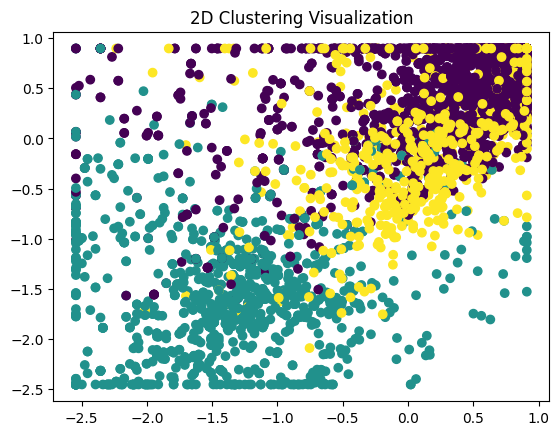

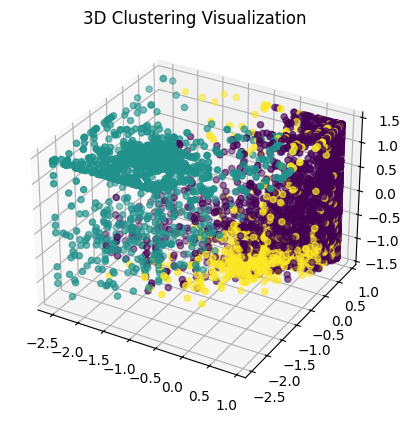

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters_kmeans)
plt.title("2D Clustering Visualization")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=clusters_kmeans)  # Select features for plotting
plt.title("3D Clustering Visualization")
plt.show()

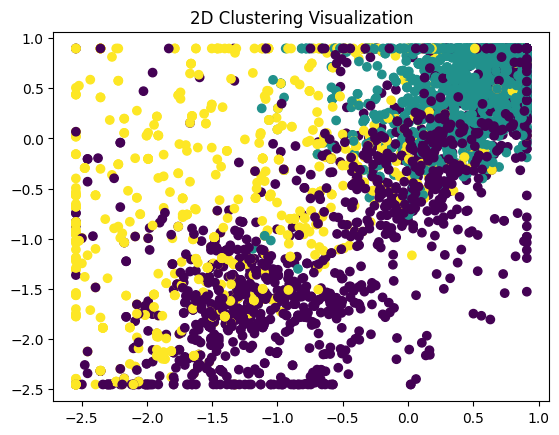

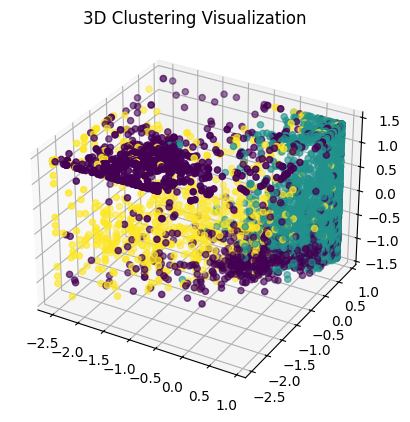

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters_ac)
plt.title("2D Clustering Visualization")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=clusters_ac)  # Select features for plotting
plt.title("3D Clustering Visualization")
plt.show()

In [ ]:
from psutil import *
# This code will return the number of CPU
print("Number of CPU: ", cpu_count())
# This code will return the CPU info
!cat /proc/cpuinfo

Number of CPU:  2
processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 85
model name	: Intel(R) Xeon(R) CPU @ 2.00GHz
stepping	: 3
microcode	: 0xffffffff
cpu MHz		: 2000.162
cache size	: 39424 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm mpx avx512f avx512dq rdseed adx smap clflushopt clwb avx512cd avx512bw avx512vl xsaveopt xsavec xgetbv1 xsaves arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf 

In [ ]:
!python --version

Python 3.11.11


In [ ]:
!pip list

Package                            Version
---------------------------------- -------------------
absl-py                            1.4.0
accelerate                         1.5.2
aiohappyeyeballs                   2.6.1
aiohttp                            3.11.14
aiosignal                          1.3.2
alabaster                          1.0.0
albucore                           0.0.23
albumentations                     2.0.5
ale-py                             0.10.2
altair                             5.5.0
annotated-types                    0.7.0
anyio                              4.9.0
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.7.1
arviz                              0.21.0
astropy                            7.0.1
astropy-iers-data                  0.2025.3.24.0.35.32
astunparse                         1.6.3
atpublic                           5.1
attrs                              25.3.0
audioread            

In [ ]:
!nvidia-smi  # Check GPU details

print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Scikit-learn version:", sklearn.__version__)

Tue Apr  1 15:41:14 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   41C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----